In [1]:
import sys
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [14]:
## 
src = cv2.imread('./fig/lenna.bmp', cv2.IMREAD_COLOR)

# dst = np.clip(src + 100., 0, 255).astype(np.uint8)
dst = cv2.add(src, (100, 100, 100, 0))

print(dst.dtype)
cv2.imshow('src', src)
cv2.imshow('dst', dst)


cv2.waitKey()
cv2.destroyAllWindows()

uint8


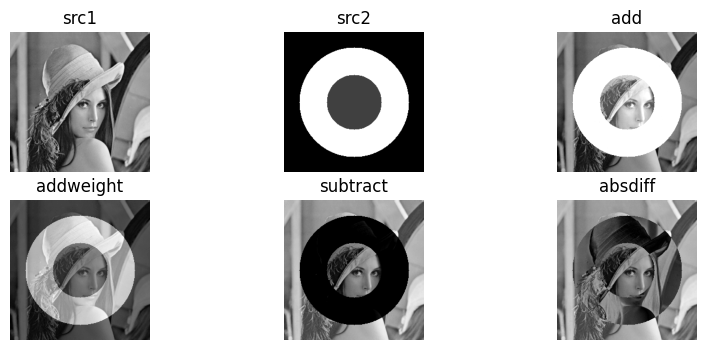

In [6]:
##
src1 = cv2.imread('./fig/lenna256.bmp', 0)
src2 = np.zeros_like(src1)
cv2.circle(src2, (128, 128), 100, 200, -1)
cv2.circle(src2, (128, 128), 50, 50, -1)

dst1 = cv2.add(src1, src2)
dst2 = cv2.addWeighted(src1, 0.5, src2, 0.5, 0)
dst3 = cv2.subtract(src1, src2)
dst4 = cv2.absdiff(src1, src2)

fig, ax = plt.subplots(2, 3, figsize = (10, 4))

ax[0, 0].imshow(src1, cmap='gray'), ax[0, 0].axis('off'), ax[0, 0].set_title('src1')
ax[0, 1].imshow(src2, cmap='gray'), ax[0, 1].axis('off'), ax[0, 1].set_title('src2')
ax[0, 2].imshow(dst1, cmap='gray'), ax[0, 2].axis('off'), ax[0, 2].set_title('add')
ax[1, 0].imshow(dst2, cmap='gray'), ax[1, 0].axis('off'), ax[1, 0].set_title('addweight')
ax[1, 1].imshow(dst3, cmap='gray'), ax[1, 1].axis('off'), ax[1, 1].set_title('subtract')
ax[1, 2].imshow(dst4, cmap='gray'), ax[1, 2].axis('off'), ax[1, 2].set_title('absdiff')
plt.show()

# cv2.imshow('src1', src1)
# cv2.imshow('src2', src2)
# cv2.imshow('dst1', dst1)
# cv2.imshow('dst2', dst2)
# cv2.imshow('dst3', dst3)
# cv2.imshow('dst4', dst4)

# cv2.waitKey()
# cv2.destroyAllWindows()

In [15]:
src = cv2.imread('./fig/nbkim.png')
dst = cv2.imread('./fig/nbkim_sunglass.png')
h, w = dst.shape[:2]
src = cv2.resize(src, (w, h), interpolation=cv2.INTER_AREA)

for i in range(100):
    alpha = i*0.01
    dst1 = cv2.addWeighted(src, 1-alpha, dst, alpha, 0)
    cv2.imshow('img', dst1)
    
    if cv2.waitKey(20) == 27:
        break

cv2.waitKey()
cv2.destroyAllWindows()

In [21]:
src = cv2.imread('./fig/flowers.jpg')
src_hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)

b, g, r = cv2.split(src)
h, s, v = cv2.split(src_hsv)


# b_add = b + 50

# dst = cv2.merge((b_add, g, r))

cv2.imshow('img', src)
cv2.imshow('b', b)
cv2.imshow('g', g)
cv2.imshow('r', r)
cv2.imshow('h', h)
cv2.imshow('s', s)
cv2.imshow('v', v)


cv2.waitKey()
cv2.destroyAllWindows()

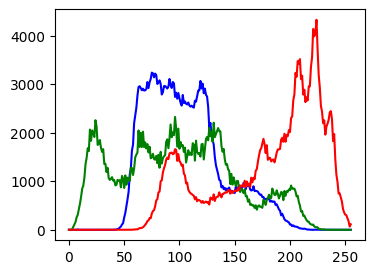

In [28]:
src = cv2.imread('./fig/lenna.bmp', 1)

# cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]]) -> hist
# images: 입력영상 리스트(리스트로 입력)
# channels: 채널리스트, 3 채널의 경우 [0,1,2]
# mask: 마스크 영상입력, 영상전체는 None으로 지정
# histSize: 히스터그램 빈의 크기
# range: 히스토그램의 최솟값과 최댓값
# hist: 계산된 히스토그램, numpy.ndarray 타입
# accumulate: 기존의 히스토그램을 누적할경우 True

hist_b = cv2.calcHist([src], [0], None, [256], [0, 256])
hist_g = cv2.calcHist([src], [1], None, [256], [0, 256])
hist_r = cv2.calcHist([src], [2], None, [256], [0, 256])


cv2.imshow('src', src)

cv2.waitKey()
cv2.destroyAllWindows()

plt.figure(figsize=(4,3))
plt.plot(hist_b, 'b')
plt.plot(hist_g, 'g')
plt.plot(hist_r, 'r')

plt.show()